## Tablica pomyłek


## Confusion matrix

In [1]:
import matplotlib.pyplot as plt
import numpy as  np 
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.model_selection import train_test_split
breast = load_breast_cancer()

from sklearn.linear_model import LogisticRegression

X, y = breast.data, breast.target
X_train_breast, X_test_breast, y_train_breast, y_test_breast = \
    train_test_split(X, y, test_size=0.23)

In [2]:
clf = LogisticRegression() #min_samples_split=10)
clf = clf.fit(X_train_breast, y_train_breast)

 Załóżmy że wykrywamy łagodną postać:
 
 - `0` - malignant złośliwy - Negative
 - `1` - benign łagodny - Positive

Suppose we detect a mild form:
 
 - `0` - malignant malicious - Negative
 - `1` - benign gentle - Positive

In [3]:
print(breast.target_names, breast.data.shape,np.unique(breast.target))

['malignant' 'benign'] (569, 30) [0 1]


In [4]:
print(breast.feature_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [5]:
from sklearn.metrics import f1_score, accuracy_score, \
   confusion_matrix, classification_report, roc_curve,\
    recall_score, precision_score

predicted = clf.predict(X_test_breast)
actual = y_test_breast

### Macierz pomyłek  - confusion matrix

### Confusion matrix

In [6]:
N = X_test_breast.shape[0]
np.sum( predicted == actual )/N

### BEGIN SOLUTION

TP = np.sum( (predicted == actual) & (predicted==1) )
TN = np.sum( (predicted == actual) & (predicted==0) )
FP = np.sum( (predicted != actual) & (predicted==1) )
FN = np.sum( (predicted != actual) & (predicted==0) )


### END SOLUTION

In [7]:
np.array([[TP,FP],[FN,TN]])

array([[83,  2],
       [ 0, 46]])

In [9]:
## !
confusion_matrix(actual,predicted)[::-1,::-1].T

array([[83,  2],
       [ 0, 46]])

In [10]:
np.testing.assert_array_equal(np.array([[TP,FP],[FN,TN]]),\
                            confusion_matrix(actual,predicted)[::-1,::-1].T)

In [11]:
Recall = None
### BEGIN SOLUTION
Recall = TP/(TP+FN)
### END SOLUTION
Recall, recall_score(actual,predicted)

(1.0, 1.0)

In [12]:
np.testing.assert_allclose( Recall, recall_score(actual,predicted), rtol=1e-3)

In [13]:
Precision = None
### BEGIN SOLUTION
Precision = TP/(TP+FP)
### END SOLUTION

In [14]:
np.testing.assert_allclose( Precision, precision_score(actual,predicted), rtol=1e-3)

In [15]:
Accuracy = None
### BEGIN SOLUTION
Accuracy = (TP+TN)/N, 
### END SOLUTION


accuracy_score(actual,predicted)

0.9847328244274809

In [16]:
np.testing.assert_allclose( Accuracy, accuracy_score(actual,predicted), rtol=1e-3)

## Receiver operating characteristic (ROC)


## Receiver operating characteristic (ROC)

Text(0.5,0,'TPR')

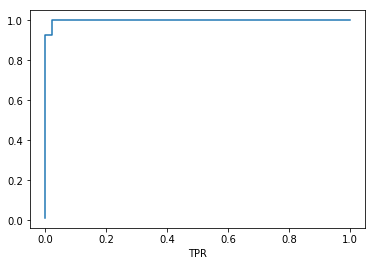

In [17]:
fpr,tpr,t = roc_curve(actual, 
                      clf.decision_function(X_test_breast) )

plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.xlabel('TPR')

In [18]:
print(classification_report(actual,predicted))

             precision    recall  f1-score   support

          0       1.00      0.96      0.98        48
          1       0.98      1.00      0.99        83

avg / total       0.99      0.98      0.98       131



In [26]:
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
import numpy as np

iris = datasets.load_iris()
X = iris.data
y = iris.target

# Add noisy features
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# Limit to the two first classes, and split into training and test
X_train, X_test, y_train, y_test = train_test_split(X[y < 2], y[y < 2],
                                                    test_size=.5,
                                                    random_state=random_state)

# Create a simple classifier
classifier = svm.LinearSVC(random_state=random_state)
classifier.fit(X_train[:,:], y_train[:])
y_score = classifier.decision_function(X_test)

Text(0.5,0,'TPR')

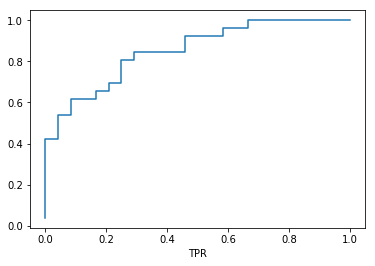

In [27]:
fpr,tpr,t = roc_curve(y_test, 
                      classifier.decision_function(X_test) )

plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.xlabel('TPR')

In [155]:
y_true = np.array([0, 0, 0, 1, 1, 1, 1, 1])
y_pred = np.array([0, 1, 0, 1, 0, 1, 0, 1])
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
tn, fp, fn, tp

(2, 1, 2, 3)

In [158]:
predicted = y_pred
actual = y_true

TP = np.sum( (predicted == actual) & (predicted==1) )
TN = np.sum( (predicted == actual) & (predicted==0) )
FP = np.sum( (predicted != actual) & (predicted==1) )
FN = np.sum( (predicted != actual) & (predicted==0) )


In [159]:
TN,FP,FN,TP

(2, 1, 2, 3)